In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn.metrics import log_loss, roc_auc_score, recall_score, precision_score, average_precision_score, f1_score, classification_report, accuracy_score, ConfusionMatrixDisplay, confusion_matrix,  roc_curve, precision_recall_curve

2022-11-23 19:11:29.844088: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [1]:
import config as conf
import data_preparation as pr
import features_extract as ex
import features_generator as fg

In [2]:
# DATA PREPARATION
train_events = conf.TRAIN_EVENTS
train_submissions = conf.TRAIN_SUBMISSIONS
test_events = conf.TEST_EVENTS
test_submissions = conf.TEST_SUBMISSIONS

In [3]:
# BASELINE FEATURES
# train_data = pr.data_preparation(train_events, train_submissions)
# test_data = pr.data_preparation(test_events, test_submissions)

In [4]:
# NEW FEATURES GENERATION
train_data = fg.features_generator(train_events, train_submissions)
test_data = fg.features_generator(test_events, test_submissions)

/Users/mitya/PycharmProjects/study/statistics/DS_and_ML_intro_Stepic_4852/Stepik_ML_contest/features_generator.py:27: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  users_metrics_n_days = users_metrics_n_days.merge(users_metrics_by_days, on='user_id', how='outer').fillna(0)
/Users/mitya/PycharmProjects/study/statistics/DS_and_ML_intro_Stepic_4852/Stepik_ML_contest/features_generator.py:27: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  users_metrics_n_days = users_metrics_n_days.merge(users_metrics_by_days, on='user_id', how='outer').fillna(0)
/Users/mitya/PycharmProjects/study/statistics/DS_and_ML_intro_Stepic_4852/Stepik_ML_contest/features_generator.py:27: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  users_metrics_n_days = use

In [5]:
# DROP FEATURES
ratio_drop = ['d_ratio', 'v_ratio', 's_ratio', 'w_ratio', 'p_ratio', 'c_ratio']
events_by_days_drop = ['d_1', 'd_2', 'v_1', 'v_2', 's_1', 's_2', 'w_1', 'w_2', 'p_1', 'p_2', 'c_1', 'c_2']
all_new_features_drop = ['d_ratio', 'v_ratio', 's_ratio', 'w_ratio', 'p_ratio', 'c_ratio', 'd_1', 'd_2', 'v_1', 'v_2', 's_1', 's_2', 'w_1', 'w_2', 'p_1', 'p_2', 'c_1', 'c_2']
custom_drop = []

train_data_copy = train_data.drop(events_by_days_drop, axis=1)
test_data_copy = test_data.drop(events_by_days_drop, axis=1)

In [6]:
# FEATURES EXTRACTION
X, y = ex.features_extract(train_data_copy)
X_res, _ = ex.features_extract(test_data_copy)

In [7]:
y = y.map({True: 1, False: 0})

In [10]:
# MODEL VALIDATION
n_features = X.shape[1]
model = Sequential()
model.add(Dense(int(round((n_features+1)/2)), input_shape=(n_features,), activation='relu'))
model.add(Dense(int(round((n_features+1)/4)), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

2022-11-23 19:11:47.037586: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
ann = model.fit(X, y, epochs=5, batch_size=10)

Epoch 1/5
1924/1924 [==============================] - 4s 1ms/step - loss: 0.2933 - accuracy: 0.8976
Epoch 2/5
1924/1924 [==============================] - 3s 1ms/step - loss: 0.2441 - accuracy: 0.8992
Epoch 3/5
1924/1924 [==============================] - 3s 1ms/step - loss: 0.2397 - accuracy: 0.8989
Epoch 4/5
1924/1924 [==============================] - 3s 2ms/step - loss: 0.2369 - accuracy: 0.8992
Epoch 5/5
1924/1924 [==============================] - 2s 1ms/step - loss: 0.2344 - accuracy: 0.8991


In [13]:
predictions_proba = model.predict(X)

602/602 [==============================] - 1s 923us/step


In [14]:
predictions = (model.predict(X) > 0.5).astype(int)

602/602 [==============================] - 1s 1ms/step


In [15]:
print('Log loss = {:.5f}'.format(log_loss(y, predictions_proba)))
print('AUC = {:.5f}'.format(roc_auc_score(y, predictions_proba)))
print('Average Precision = {:.5f}'.format(average_precision_score(y, predictions_proba)))
print('\nUsing 0.5 as threshold:')
print('Accuracy = {:.5f}'.format(accuracy_score(y, predictions)))
print('Precision = {:.5f}'.format(precision_score(y, predictions)))
print('Recall = {:.5f}'.format(recall_score(y, predictions)))
print('F1 score = {:.5f}'.format(f1_score(y, predictions)))

print('\nClassification Report')
print(classification_report(y, predictions))

Log loss = 0.23359
AUC = 0.87698
Average Precision = 0.42298

Using 0.5 as threshold:
Accuracy = 0.89940
Precision = 0.70886
Recall = 0.02846
F1 score = 0.05471

Classification Report
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     17266
           1       0.71      0.03      0.05      1968

    accuracy                           0.90     19234
   macro avg       0.80      0.51      0.50     19234
weighted avg       0.88      0.90      0.86     19234



In [16]:
fpr, tpr, _ = roc_curve(y, predictions_proba)

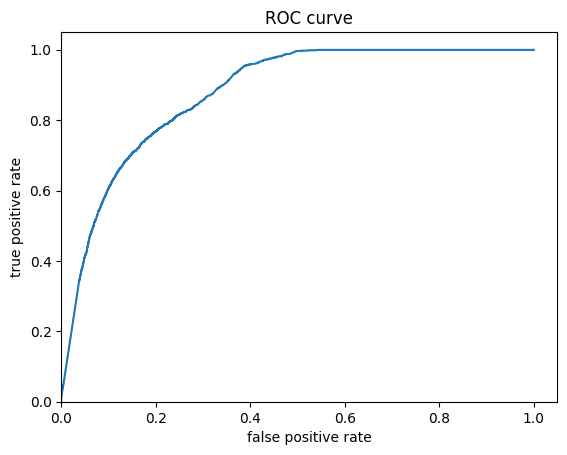

In [17]:
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.xlim(0,)
plt.ylim(0,)
plt.show()

In [18]:
pr, rc, _ = precision_recall_curve(y, predictions_proba)

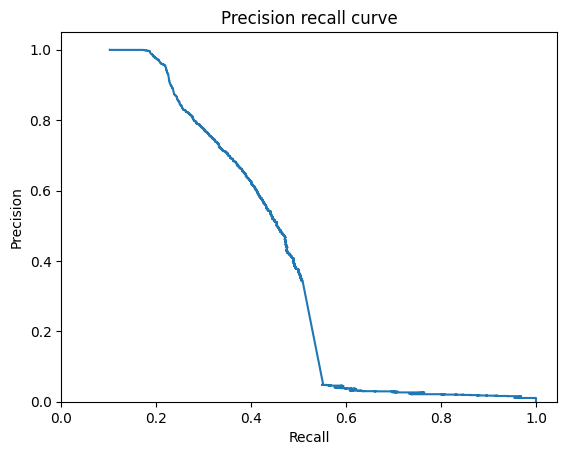

In [19]:
plt.plot(pr, rc)
plt.title('Precision recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim(0,)
plt.ylim(0,)
plt.show()

Confusion Matrix


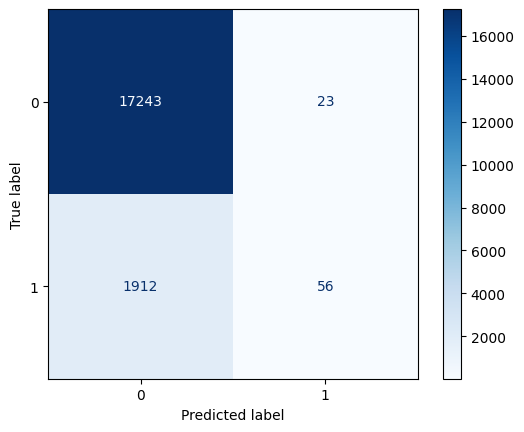

In [20]:
print('Confusion Matrix')
conf_matrix = confusion_matrix(y, predictions)
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap=plt.cm.Blues, values_format='g')
plt.show()

In [21]:
# PREDICTION
predictions_proba_res = model.predict(X_res)

194/194 [==============================] - 0s 1ms/step


In [22]:
# EXPORT DATA
result = pd.concat([pd.Series(test_data.index), pd.DataFrame(predictions_proba_res)], axis=1).rename(columns={0: 'is_gone'}).set_index('user_id')

In [23]:
result.to_csv('/Users/mitya/prediction_res_tf.csv')

In [ ]:
# RESULT
'''
Baseline:       0.8823723622396438
Ratio:          0.8783684145285766
Events by days: 0.8832608336601139

'''